# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
#!pip install pandas seaborn

---

# (실습준비) 데이터 불러오기부터

In [ ]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
from datetime import datetime, timedelta

# 학습 데이터 로딩
air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

In [113]:
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')

In [170]:
air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )

In [ ]:
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )

In [114]:
pd.set_option('display.max_columns', 100)

---

# 1. 이상치/결측치 처리

#### [실습문제1] 미세먼지 데이터 결측치 처리
* 미세먼지 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.


* 앞서 데이터 불러오기 및 분석 단계에서 확인한 불필요한 변수에 대해 제거 해 주세요. 

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [172]:
air_dropcols = ['지역', '망', '측정소코드', '측정소명', '주소']
air_21.drop(air_dropcols, axis=1, inplace=True)
#air_22.drop(air_dropcols, axis=1, inplace=True)

KeyError: "['지역', '망', '측정소코드', '측정소명', '주소'] not found in axis"

In [116]:
air_21.rename(columns={'일시':'측정일시'}, inplace=True)
air_22.rename(columns={'일시':'측정일시'}, inplace=True)

In [165]:
air_21['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

In [175]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour
2208,2021-01-01,0.002,0.5,0.022,0.016,24.0,14.0,1
2230,2021-01-01,0.004,0.5,0.024,0.017,28.0,16.0,23
2229,2021-01-01,0.003,0.5,0.024,0.020,26.0,14.0,22
2228,2021-01-01,0.003,0.5,0.020,0.023,27.0,15.0,21
2227,2021-01-01,0.003,0.5,0.019,0.024,27.0,17.0,20


In [200]:
air_21 = air_21.sort_values(by=['측정일시', 'hour'], ascending=True)

In [211]:
air_21.drop('index', axis=1, inplace=True)

In [212]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour
0,2021-01-01,0.002,0.5,0.022,0.016,24.0,14.0,1
1,2021-01-01,0.002,0.6,0.018,0.020,25.0,14.0,2
2,2021-01-01,0.002,0.6,0.013,0.025,27.0,16.0,3
3,2021-01-01,0.003,0.6,0.011,0.027,23.0,13.0,4
4,2021-01-01,0.003,0.6,0.008,0.032,24.0,14.0,5


In [207]:
air_21 = air_21.reset_index()

In [209]:
air_21.tail()

,index,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour
8754,2202,2021-12-31,0.003,0.4,0.026,0.019,25.0,10.0,19
8755,2203,2021-12-31,0.003,0.4,0.025,0.020,26.0,8.0,20
8756,2204,2021-12-31,0.003,0.4,0.030,0.014,27.0,9.0,21
8757,2205,2021-12-31,0.003,0.4,0.033,0.011,20.0,8.0,22
8758,2206,2021-12-31,0.003,0.4,0.029,0.015,20.0,9.0,23


In [193]:
air_22.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour
0,2022-01-01,0.003,0.4,0.026,0.016,23.0,12.0,1
1,2022-01-01,0.003,0.4,0.022,0.020,20.0,9.0,2
2,2022-01-01,0.003,0.5,0.014,0.028,20.0,9.0,3
3,2022-01-01,0.003,0.5,0.016,0.027,19.0,10.0,4
4,2022-01-01,0.003,0.5,0.005,0.040,24.0,11.0,5


In [213]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21.isna().sum()

측정일시      0
SO2     112
CO       80
O3       97
NO2      80
PM10    105
PM25     97
hour      0
dtype: int64

In [192]:
air_22.isna().sum()

측정일시     0
SO2     21
CO      21
O3      21
NO2     21
PM10    38
PM25    25
hour     0
dtype: int64

In [214]:
air_21 = air_21.interpolate()
air_22 = air_22.interpolate()

#### [실습문제2] 날씨 데이터 결측치 처리
* 날씨 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.

* '강우량'을 어떻게 해야할까요?

In [177]:
weather_21.head()

,측정일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),hour
0,2021-01-01,-8.7,NaN,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,NaN,NaN,NaN,0.0,0,NaN,2000,-6.9,-1.0,-0.8,0.3,1.6,1
1,2021-01-01,-9.1,NaN,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,NaN,NaN,NaN,0.0,0,NaN,2000,-7.1,-1.1,-0.8,0.3,1.6,2
2,2021-01-01,-9.3,NaN,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,NaN,NaN,NaN,0.0,0,NaN,2000,-7.3,-1.2,-0.9,0.3,1.6,3
3,2021-01-01,-9.3,NaN,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,NaN,NaN,NaN,0.0,0,NaN,2000,-7.5,-1.3,-1.0,0.2,1.5,4
4,2021-01-01,-9.7,NaN,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,NaN,NaN,NaN,0.0,0,NaN,2000,-7.6,-1.3,-1.0,0.2,1.5,5


In [194]:
weather_21.tail()

,측정일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),hour
8754,2021-12-31,-6.4,0.0,2.2,250.0,34,1.3,-19.7,1021.1,1032.3,0.0,0.0,0.0,0.0,0,10.0,2000,-4.5,-0.5,-0.7,-0.1,1.0,19
8755,2021-12-31,-6.3,0.0,4.1,320.0,35,1.3,-19.2,1021.2,1032.4,0.0,0.0,0.0,0.0,0,10.0,2000,-5.3,-0.6,-0.8,-0.1,1.0,20
8756,2021-12-31,-6.7,0.0,4.8,320.0,36,1.3,-19.3,1021.2,1032.4,0.0,0.0,0.0,0.0,0,10.0,2000,-5.7,-0.7,-0.8,-0.1,1.0,21
8757,2021-12-31,-7.5,0.0,3.0,320.0,37,1.3,-19.7,1021.8,1033.1,0.0,0.0,0.0,0.0,0,10.0,2000,-6.2,-0.8,-0.9,-0.2,1.0,22
8758,2021-12-31,-7.7,0.0,2.9,320.0,38,1.3,-19.5,1021.9,1033.2,0.0,0.0,0.0,0.0,0,10.0,2000,-6.5,-0.9,-0.9,-0.2,1.0,23


In [166]:
weather_21['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

In [178]:
drop_col = ['지점','지점명', '지면상태(지면상태코드)', '현상번호(국내식)','3시간신적설(cm)','운형(운형약어)','지면상태(지면상태코드)',
           '기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그',
          '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '일조 QC플래그', '일사 QC플래그',
          '지면온도 QC플래그']
weather_21.drop(drop_col, axis=1, inplace=True)

KeyError: "['지점', '지점명', '지면상태(지면상태코드)', '현상번호(국내식)', '3시간신적설(cm)', '운형(운형약어)', '지면상태(지면상태코드)', '기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그'] not found in axis"

In [179]:
weather_22.drop(drop_col, axis=1, inplace=True)

KeyError: "['지점', '지점명', '지면상태(지면상태코드)', '현상번호(국내식)', '3시간신적설(cm)', '운형(운형약어)', '지면상태(지면상태코드)', '기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그'] not found in axis"

In [216]:
weather_22.isna().sum()

측정일시             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
hour             0
dtype: int64

In [215]:
weather_21.isna().sum()

측정일시             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
hour             0
dtype: int64

In [182]:
# 2021-01-07 11:00~13:00 제외한 값은 nan이므로 밤일때는 일조, 일사량을 0으로 채운다.
weather_21.loc[((weather_21['hour']>18) | (weather_21['hour']<8)) &  (weather_21['일조(hr)'].isnull()), '일조(hr)'] = 0
weather_21.loc[((weather_21['hour']>18) | (weather_21['hour']<8)) &  (weather_21['일사(MJ/m2)'].isnull()), '일사(MJ/m2)'] = 0

In [183]:
weather_22['일조(hr)'].fillna(0, inplace=True)
weather_22['일사(MJ/m2)'].fillna(0, inplace=True)

In [184]:
weather_21['강수량(mm)'].fillna(0, inplace=True)
weather_22['강수량(mm)'].fillna(0, inplace=True)
weather_21['적설(cm)'].fillna(0, inplace=True)
weather_22['적설(cm)'].fillna(0, inplace=True)

In [185]:
weather_21['풍속(m/s)'] = weather_21['풍속(m/s)'].interpolate()

In [186]:
weather_21['풍향(16방위)'] = weather_21['풍향(16방위)'].fillna(method='ffill')

In [187]:
cols3 = ['일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']
for column in cols3:
    weather_21[column] = weather_21[column].interpolate()

In [188]:
weather_21['최저운고(100m )'] = weather_21['최저운고(100m )'].interpolate()
weather_22['최저운고(100m )'] = weather_22['최저운고(100m )'].interpolate()

In [189]:
weather_21['최저운고(100m )'] = weather_21['최저운고(100m )'].fillna(method='bfill')
weather_22['최저운고(100m )'] = weather_22['최저운고(100m )'].fillna(method='bfill')

In [190]:
weather_21.to_csv('pre_weather_2021_2.csv', index=False)
weather_22.to_csv('pre_weather_2022_2.csv', index=False)

In [105]:
weather_21.head()

,측정일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),hour
0,2021-01-01,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,0.0,2000,-6.9,-1.0,-0.8,0.3,1.6,1
1,2021-01-01,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,0.0,0.0,0.0,0.0,0,0.0,2000,-7.1,-1.1,-0.8,0.3,1.6,2
2,2021-01-01,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,0.0,0.0,0.0,0.0,0,0.0,2000,-7.3,-1.2,-0.9,0.3,1.6,3
3,2021-01-01,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,0.0,0.0,0.0,0.0,0,0.0,2000,-7.5,-1.3,-1.0,0.2,1.5,4
4,2021-01-01,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,0.0,0.0,0.0,0.0,0,0.0,2000,-7.6,-1.3,-1.0,0.2,1.5,5


In [147]:
weather_21.isna().sum()

측정일시             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
hour             0
dtype: int64

In [143]:
weather_21.

,측정일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),hour
0,2021-01-01,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,NaN,2000,-6.9,-1.0,-0.8,0.3,1.6,1
1,2021-01-01,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,0.0,0.0,0.0,0.0,0,NaN,2000,-7.1,-1.1,-0.8,0.3,1.6,2
2,2021-01-01,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,0.0,0.0,0.0,0.0,0,NaN,2000,-7.3,-1.2,-0.9,0.3,1.6,3
3,2021-01-01,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,0.0,0.0,0.0,0.0,0,NaN,2000,-7.5,-1.3,-1.0,0.2,1.5,4
4,2021-01-01,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,0.0,0.0,0.0,0.0,0,NaN,2000,-7.6,-1.3,-1.0,0.2,1.5,5


In [149]:
weather_21.corr()

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),hour
기온(°C),1.000000,0.034132,-0.070213,-0.181454,0.145404,0.881615,0.926402,-0.680025,-0.707822,0.118836,0.292340,-0.253583,0.307568,0.153382,0.065729,0.068418,0.946657,0.951014,0.938467,0.917762,0.901952,0.131491
강수량(mm),0.034132,1.000000,0.067246,-0.028206,0.174896,0.090728,0.088094,-0.117994,-0.115631,-0.070944,-0.060926,-0.002284,0.144379,0.160074,-0.105788,-0.255459,0.027152,0.047430,0.055141,0.056978,0.058077,0.015913
풍속(m/s),-0.070213,0.067246,1.000000,0.173027,-0.285461,-0.147825,-0.169976,-0.045744,-0.040280,0.253456,0.264616,0.039182,-0.027250,0.036109,-0.125234,0.106502,0.014138,-0.068805,-0.083231,-0.103228,-0.112692,0.204674
풍향(16방위),-0.181454,-0.028206,0.173027,1.000000,-0.200920,-0.189045,-0.231850,0.043986,0.052206,0.073433,0.049429,0.015868,-0.176899,-0.095071,-0.110468,0.025532,-0.138136,-0.146636,-0.153058,-0.165333,-0.175071,0.204953
습도(%),0.145404,0.174896,-0.285461,-0.200920,1.000000,0.450867,0.501853,-0.359807,-0.354960,-0.496522,-0.460365,0.028956,0.362189,0.379977,-0.285336,-0.501758,0.055417,0.221444,0.248573,0.283915,0.304002,-0.274028
증기압(hPa),0.881615,0.090728,-0.147825,-0.189045,0.450867,1.000000,0.946841,-0.712216,-0.732223,-0.080442,0.072670,-0.168924,0.356879,0.239803,-0.094845,-0.038048,0.830644,0.912386,0.915057,0.915250,0.913778,0.010494
이슬점온도(°C),0.926402,0.088094,-0.169976,-0.231850,0.501853,0.946841,1.000000,-0.726512,-0.748944,-0.091461,0.072779,-0.213707,0.397840,0.269643,-0.050910,-0.108015,0.846028,0.917551,0.917842,0.914350,0.908812,0.011369
현지기압(hPa),-0.680025,-0.117994,-0.045744,0.043986,-0.359807,-0.712216,-0.726512,1.000000,0.999241,0.077576,-0.076323,0.084902,-0.358562,-0.306983,0.184318,0.140369,-0.646103,-0.703692,-0.699869,-0.692738,-0.683026,-0.037583
해면기압(hPa),-0.707822,-0.115631,-0.040280,0.052206,-0.354960,-0.732223,-0.748944,0.999241,1.000000,0.068911,-0.088354,0.095484,-0.362059,-0.304160,0.173681,0.132208,-0.672073,-0.727919,-0.723598,-0.715671,-0.705490,-0.042940
일조(hr),0.118836,-0.070944,0.253456,0.073433,-0.496522,-0.080442,-0.091461,0.077576,0.068911,1.000000,0.820318,-0.013411,-0.343151,-0.322576,0.035075,0.197525,0.289978,0.015011,-0.015791,-0.045696,-0.048160,0.143744


In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),hour
0,2021-01-01,-8.7,NaN,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,...,0.0,0,NaN,2000,-6.9,-1.0,-0.8,0.3,1.6,1
1,2021-01-01,-9.1,NaN,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,...,0.0,0,NaN,2000,-7.1,-1.1,-0.8,0.3,1.6,2
2,2021-01-01,-9.3,NaN,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,...,0.0,0,NaN,2000,-7.3,-1.2,-0.9,0.3,1.6,3
3,2021-01-01,-9.3,NaN,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,...,0.0,0,NaN,2000,-7.5,-1.3,-1.0,0.2,1.5,4
4,2021-01-01,-9.7,NaN,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,...,0.0,0,NaN,2000,-7.6,-1.3,-1.0,0.2,1.5,5


#### [실습문제3] air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성하기


* air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [171]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
def air_date(air_21):
    List = list(air_21['측정일시'])
    for i in range(len(List)):
        string = str(List[i])
        date = string[:8]
        hour = string[-2:]
        formatted = datetime.strptime(date,'%Y%m%d')
        formatted = formatted + timedelta(hours=int(hour))
        air_21['측정일시'][i] = formatted

    air_21['측정일시'] = pd.to_datetime(air_21['측정일시'])
    air_21['hour'] = air_21['측정일시'].dt.hour
    air_21['측정일시'] = air_21['측정일시'].dt.date
    return air_21
air_21 = air_date(air_21)
#air_22 = air_date(air_22)

C:\Users\ferro\AppData\Local\Temp\ipykernel_8264\58635958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_21['측정일시'][i] = formatted


#### [실습문제4] weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성하기


* weather_21, weather_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [155]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_22['일시'] = pd.to_datetime(weather_22['일시'])
weather_22['hour'] = weather_22['일시'].dt.hour
weather_22['일시'] = weather_22['일시'].dt.date

In [154]:
weather_21['일시'] = pd.to_datetime(weather_21['일시'])
weather_21['hour'] = weather_21['일시'].dt.hour
weather_21['일시'] = weather_21['일시'].dt.date

In [156]:
weather_21.rename(columns={'일시':'측정일시'}, inplace=True)

In [157]:
weather_22.rename(columns={'일시':'측정일시'}, inplace=True)

---

# 2. 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보겠습니다

#### [실습문제5] 데이터 합치기
* 'df_21','df_22'에 21년도와 22년도의 미세먼지, 날씨 데이터를 합쳐 넣도록 하겠습니다.

In [217]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_21 = pd.merge(air_21, weather_21, left_on = ['측정일시', 'hour'], right_on=['측정일시', 'hour'], how='inner')
df_22 = pd.merge(air_22, weather_22, left_on = ['측정일시', 'hour'], right_on=['측정일시', 'hour'], how='inner')

In [218]:
df_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01,0.002,0.5,0.022,0.016,24.0,14.0,1,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,12.0,2000,-6.9,-1.0,-0.8,0.3,1.6
1,2021-01-01,0.002,0.6,0.018,0.020,25.0,14.0,2,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,0.0,0.0,0.0,0.0,0,12.0,2000,-7.1,-1.1,-0.8,0.3,1.6
2,2021-01-01,0.002,0.6,0.013,0.025,27.0,16.0,3,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,0.0,0.0,0.0,0.0,0,12.0,2000,-7.3,-1.2,-0.9,0.3,1.6
3,2021-01-01,0.003,0.6,0.011,0.027,23.0,13.0,4,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,0.0,0.0,0.0,0.0,0,12.0,2000,-7.5,-1.3,-1.0,0.2,1.5
4,2021-01-01,0.003,0.6,0.008,0.032,24.0,14.0,5,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,0.0,0.0,0.0,0.0,0,12.0,2000,-7.6,-1.3,-1.0,0.2,1.5


In [219]:
df_21.isna().sum()

측정일시             0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
hour             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

In [220]:
df_22.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2022-01-01,0.003,0.4,0.026,0.016,23.0,12.0,1,-9.2,0.0,1.8,270,42,1.3,-19.7,1022.2,1033.6,0.0,0.0,0.0,0,0,35.0,2000,-7.2,-1.1,-1.1,-0.2,1.0
1,2022-01-01,0.003,0.4,0.022,0.020,20.0,9.0,2,-9.5,0.0,1.2,270,43,1.3,-19.7,1022.3,1033.7,0.0,0.0,0.0,0,0,35.0,2000,-7.5,-1.3,-1.2,-0.2,1.0
2,2022-01-01,0.003,0.5,0.014,0.028,20.0,9.0,3,-9.3,0.0,1.4,290,46,1.4,-18.8,1022.6,1034.0,0.0,0.0,0.0,0,0,35.0,2000,-7.6,-1.4,-1.2,-0.2,1.0
3,2022-01-01,0.003,0.5,0.016,0.027,19.0,10.0,4,-9.6,0.0,1.7,340,48,1.4,-18.5,1021.9,1033.3,0.0,0.0,0.0,0,0,35.0,2000,-7.6,-1.4,-1.3,-0.3,1.0
4,2022-01-01,0.003,0.5,0.005,0.040,24.0,11.0,5,-9.7,0.0,0.8,270,51,1.5,-17.9,1022.0,1033.4,0.0,0.0,0.0,0,0,35.0,2000,-7.7,-1.5,-1.4,-0.3,1.0


In [87]:
df_21.columns

Index(['측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'hour', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [88]:
df_22.columns

Index(['측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'hour', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

#### [실습문제6] 각종 인자 추가 및 사용하지 않을 변수 제거

* 새로운 인자를 추가 하세요.


* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.

In [221]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_21.corr()['PM10']

SO2              0.219096
CO               0.312286
O3              -0.027966
NO2              0.243387
PM10             1.000000
PM25             0.675412
hour             0.026782
기온(°C)          -0.127543
강수량(mm)         -0.044771
풍속(m/s)          0.011610
풍향(16방위)         0.099172
습도(%)           -0.066366
증기압(hPa)        -0.205246
이슬점온도(°C)       -0.140119
현지기압(hPa)        0.021829
해면기압(hPa)        0.027448
일조(hr)           0.037958
일사(MJ/m2)        0.023537
적설(cm)           0.006801
전운량(10분위)       -0.100603
중하층운량(10분위)     -0.090630
최저운고(100m )      0.032662
시정(10m)         -0.349714
지면온도(°C)        -0.140371
5cm 지중온도(°C)    -0.177060
10cm 지중온도(°C)   -0.184551
20cm 지중온도(°C)   -0.195877
30cm 지중온도(°C)   -0.208736
Name: PM10, dtype: float64

In [232]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
cols = ['적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '5cm 지중온도(°C)', '10cm 지중온도(°C)'
       , '20cm 지중온도(°C)', '30cm 지중온도(°C)']
df_21.drop(cols, axis=1, inplace=True)
df_22.drop(cols, axis=1, inplace=True)
df_21.to_csv('train.csv', index=False)
df_22.to_csv('test.csv', index=False)

In [234]:
cols = ['적설(cm)','5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']
df_21.drop(cols, axis=1, inplace=True)
df_22.drop(cols, axis=1, inplace=True)
df_21.to_csv('train2.csv', index=False)
df_22.to_csv('test2.csv', index=False)

In [226]:
cols = ['적설(cm)','5cm 지중온도(°C)', '10cm 지중온도(°C)'
       , '20cm 지중온도(°C)', '30cm 지중온도(°C)']
df_21.drop(cols, axis=1, inplace=True)
df_22.drop(cols, axis=1, inplace=True)
df_21.to_csv('train3.csv', index=False)
df_22.to_csv('test3.csv', index=False)

In [242]:
df_21.to_csv('train4.csv', index=False)
df_22.to_csv('test4.csv', index=False)

In [239]:
df_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),PM10_t1
0,2021-01-01,0.002,0.5,0.022,0.016,24.0,14.0,1,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0,12.0,2000,-6.9,25.0
1,2021-01-01,0.002,0.6,0.018,0.020,25.0,14.0,2,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,0.0,0.0,0.0,0,12.0,2000,-7.1,27.0
2,2021-01-01,0.002,0.6,0.013,0.025,27.0,16.0,3,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,0.0,0.0,0.0,0,12.0,2000,-7.3,23.0
3,2021-01-01,0.003,0.6,0.011,0.027,23.0,13.0,4,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,0.0,0.0,0.0,0,12.0,2000,-7.5,24.0
4,2021-01-01,0.003,0.6,0.008,0.032,24.0,14.0,5,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,0.0,0.0,0.0,0,12.0,2000,-7.6,26.0


In [240]:
# 데이터 다시 생성용...
df_21 = pd.merge(air_21, weather_21, left_on = ['측정일시', 'hour'], right_on=['측정일시', 'hour'], how='inner')
df_22 = pd.merge(air_22, weather_22, left_on = ['측정일시', 'hour'], right_on=['측정일시', 'hour'], how='inner')
df_21['PM10_t1'] = df_21['PM10'].shift(-1)
df_21.drop(index=df_21.tail(1).index, axis=0, inplace=True)
df_21.tail()
df_22['PM10_t1'] = df_22['PM10'].shift(-1)
df_22.drop(index=df_22.tail(1).index, axis=0, inplace=True)
df_22.tail()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),PM10_t1
2153,2022-03-31,0.003,0.4,0.043,0.011,9.0,6.0,18,13.2,0.0,4.3,340,45,6.8,1.5,1013.1,1023.4,0.1,0.53,0.0,9,0,12.5,2000,12.4,12.9,12.0,10.8,10.1,10.0
2154,2022-03-31,0.002,0.4,0.044,0.010,10.0,9.0,19,12.3,0.0,2.9,340,47,6.7,1.2,1013.4,1023.8,0.4,0.20,0.0,6,1,9.0,2000,10.0,12.6,11.8,11.0,10.2,11.0
2155,2022-03-31,0.002,0.4,0.036,0.017,11.0,8.0,20,11.6,0.0,2.7,340,48,6.5,0.9,1014.6,1025.0,0.0,0.00,0.0,6,0,9.5,2000,8.9,12.2,11.6,11.0,10.3,10.0
2156,2022-03-31,0.002,0.4,0.032,0.018,10.0,7.0,21,10.5,0.0,3.5,320,51,6.4,0.7,1015.4,1025.9,0.0,0.00,0.0,1,1,10.0,2000,7.8,11.8,11.4,11.0,10.4,11.0
2157,2022-03-31,0.003,0.3,0.038,0.013,11.0,5.0,22,9.3,0.0,1.9,50,58,6.8,1.4,1016.4,1026.9,0.0,0.00,0.0,3,3,10.0,2000,7.3,11.4,11.1,10.9,10.5,11.0


In [241]:
df_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),PM10_t1
0,2021-01-01,0.002,0.5,0.022,0.016,24.0,14.0,1,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,12.0,2000,-6.9,-1.0,-0.8,0.3,1.6,25.0
1,2021-01-01,0.002,0.6,0.018,0.020,25.0,14.0,2,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,0.0,0.0,0.0,0.0,0,12.0,2000,-7.1,-1.1,-0.8,0.3,1.6,27.0
2,2021-01-01,0.002,0.6,0.013,0.025,27.0,16.0,3,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,0.0,0.0,0.0,0.0,0,12.0,2000,-7.3,-1.2,-0.9,0.3,1.6,23.0
3,2021-01-01,0.003,0.6,0.011,0.027,23.0,13.0,4,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,0.0,0.0,0.0,0.0,0,12.0,2000,-7.5,-1.3,-1.0,0.2,1.5,24.0
4,2021-01-01,0.003,0.6,0.008,0.032,24.0,14.0,5,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,0.0,0.0,0.0,0.0,0,12.0,2000,-7.6,-1.3,-1.0,0.2,1.5,26.0


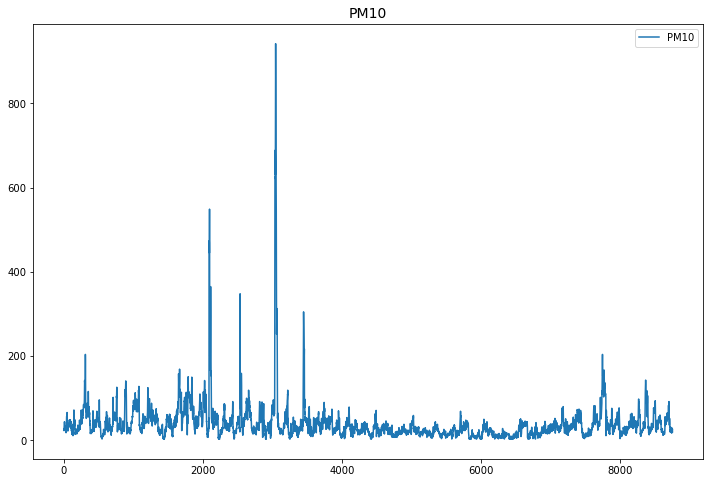

In [238]:
c = ['측정일시', 'PM10']
d = df_21.loc[:, c]
d.plot(figsize=[12, 8])
plt.title('PM10', fontsize=14)
plt.show()

In [229]:
df_21.columns

Index(['측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'hour', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'PM10_t1'],
      dtype='object')

#### [실습문제7] 미세먼지 농도 다음시점 데이터 생성

* t+1 시점 데이터 생성

In [98]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_21['PM10_t1'] = df_21['PM10'].shift(-1)
df_21.drop(index=df_21.tail(1).index, axis=0, inplace=True)
df_21.tail()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),시정(10m),지면온도(°C),PM10_t1
8754,2021-09-30,0.003,0.7,0.020,0.036,35.0,24.0,20,21.7,0.0,0.9,320.0,79,20.4,17.8,998.8,1008.6,0.0,0.0,2000,19.9,34.0
8755,2021-09-30,0.003,0.6,0.016,0.035,34.0,21.0,21,20.9,0.0,0.4,0.0,83,20.4,17.8,999.2,1009.1,0.0,0.0,2000,19.2,30.0
8756,2021-09-30,0.003,0.6,0.012,0.036,30.0,19.0,22,20.4,0.0,0.8,70.0,81,19.4,17.0,999.2,1009.1,0.0,0.0,2000,18.6,33.0
8757,2021-09-30,0.003,0.6,0.004,0.042,33.0,19.0,23,19.7,0.0,1.4,20.0,81,18.5,16.3,999.2,1009.1,0.0,0.0,2000,18.1,29.0
8758,2021-10-01,0.003,0.6,0.003,0.042,29.0,17.0,0,19.2,0.0,1.3,360.0,83,18.4,16.2,998.8,1008.7,0.0,0.0,2000,17.8,NaN


In [101]:
df_22['PM10_t1'] = df_22['PM10'].shift(-1)
df_22.drop(index=df_22.tail(1).index, axis=0, inplace=True)
df_22.tail()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),시정(10m),지면온도(°C),PM10_t1
2153,2022-03-31,0.003,0.4,0.043,0.011,9.0,6.0,18,13.2,0.0,4.3,340,45,6.8,1.5,1013.1,1023.4,0.1,0.53,2000,12.4,10.0
2154,2022-03-31,0.002,0.4,0.044,0.010,10.0,9.0,19,12.3,0.0,2.9,340,47,6.7,1.2,1013.4,1023.8,0.4,0.20,2000,10.0,11.0
2155,2022-03-31,0.002,0.4,0.036,0.017,11.0,8.0,20,11.6,0.0,2.7,340,48,6.5,0.9,1014.6,1025.0,0.0,0.00,2000,8.9,10.0
2156,2022-03-31,0.002,0.4,0.032,0.018,10.0,7.0,21,10.5,0.0,3.5,320,51,6.4,0.7,1015.4,1025.9,0.0,0.00,2000,7.8,11.0
2157,2022-03-31,0.003,0.3,0.038,0.013,11.0,5.0,22,9.3,0.0,1.9,50,58,6.8,1.4,1016.4,1026.9,0.0,0.00,2000,7.3,11.0


---

# 3. train / test split

#### [실습문제7] 데이터셋 나누기 

* 데이터셋을 train(21년도 데이터), test(22년도 데이터)로 나눠 csv로 저장하도록 하겠습니다.


* train_x / train_y / test_x / test_y 로 나누세요.


* train_x.csv / train_y.csv / test_x.csv / test_y.csv 로 저장하세요.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



---